

| <h1> **Prelim Exam** </h1> | <h1>  </h1> |
|--- | --- |
Names:  
**Luigi Francisco**
**Raven Charles Roy Jacinto**
Course and Section: **CPE019 - CPE32S3**
Instructor: **Engr. Roman Richard**
Date Performed: **February 28, 2024**
Date Submitted: **March 6 , 2024**



# **Choose any dataset applicable for classification and/or prediction analysis problems. Provide Evaluation reports for all models.**


#### - **Show the application of the following algorithms:**
### **Linear Regression**
### **Singular LR**
### **Multiple LR**
### **Polynomial LR**
### **Logistic Regression**
### **Decision Tree**
### **Random Forest**




NOTE: Submit the github link that contains all files (pdf report, dataset and python notebooks).

# **Linear Regression**


**Singular Linear Regression**

Coefficients: 
 [[0.00477014]]
Mean squared error: 0.85
Coefficient of determination: 0.68
0.681495738987177
With a rain fall(mm) of [1400] The model predicts that you will get a yield(Q/acre) of [[11.82551419]]


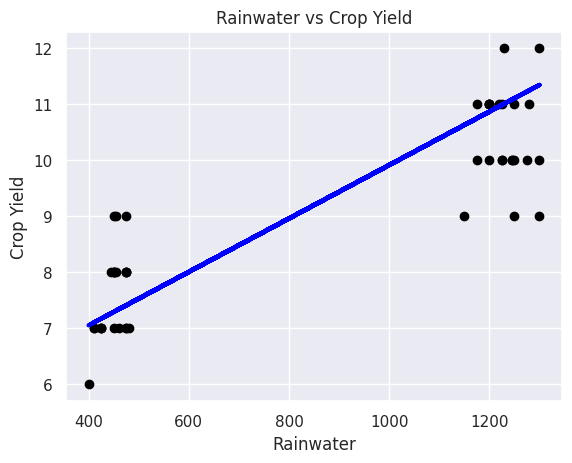

In [ ]:
import pandas as pd
import sklearn as sk
import matplotlib as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('crop.csv')
df=df.dropna()

# Code for Linear Regression Only One


rainfall_X = df['Rain Fall (mm)'].to_numpy()
yield_y = df['Yeild (Q/acre)'].to_numpy()

length = len(df.index)

rainfall_X = rainfall_X.reshape(length,-1)
yield_y = yield_y.reshape(length,-1)


rainfall_X_train = rainfall_X[:-45] #468 entries
rainfall_X_test = rainfall_X[-45:]  #300 entries

yield_y_train = yield_y[:-45]
yield_y_test = yield_y[-45:]

RegGluOut = linear_model.LinearRegression()
RegGluOut.fit(rainfall_X_train, yield_y_train)

RegGluOut_y_pred = RegGluOut.predict(rainfall_X_test)

# The coefficients
print("Coefficients: \n", RegGluOut.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(yield_y_test, RegGluOut_y_pred)) # Smaller better
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yield_y_test, RegGluOut_y_pred)) #closer to one better
print(RegGluOut.score(rainfall_X_test,yield_y_test))
#Example Data and Prediction
ExampleRain = [1400]
ExpectedOutcome = RegGluOut.predict([ExampleRain])
print("With a rain fall(mm) of "+str(ExampleRain)+" The model predicts that you will get a yield(Q/acre) of "+str(ExpectedOutcome))
# Plot outputs
plt.scatter(rainfall_X_test, yield_y_test, color="black")

plt.plot(rainfall_X_test, RegGluOut_y_pred, color="blue", linewidth=3)

plt.title('Rainwater vs Crop Yield')
plt.xlabel('Rainwater')
plt.ylabel('Crop Yield')

plt.show()






**Evaluation:**

In this singular linear regression. We pit the rainfall in mm agaist the yield per acre in a land. Here due to the original data being an xlsx file converted into csv had multiple entries with NaN values that had to be dropped in order to perform a linear regression. The score of the model indicates it to be somewhat alright when tested against its test data.

**Multiple Linear Regression**

mean_squared_error :  0.8228918671107234
mean_absolute_error :  0.723965600597294
Coefficient: [0.00305778 0.05480037]
Intercept: 2.809832098560735
Coefficient of determination: 0.77
    Rain Fall (mm)  Fertilizer
0           1230.0        80.0
1            480.0        60.0
2           1250.0        75.0
3            450.0        65.0
4           1200.0        80.0
..             ...         ...
94          1250.0        77.0
95           425.0        60.0
96          1220.0        79.0
97           480.0        65.0
98          1230.0        80.0

[99 rows x 2 columns]
0.7953023764204179 score for whole data
0.7744815224117994 score for test data
[13.2998298] is the predicted yield when there is 1280mm of rainfall with 120 fertilizer.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


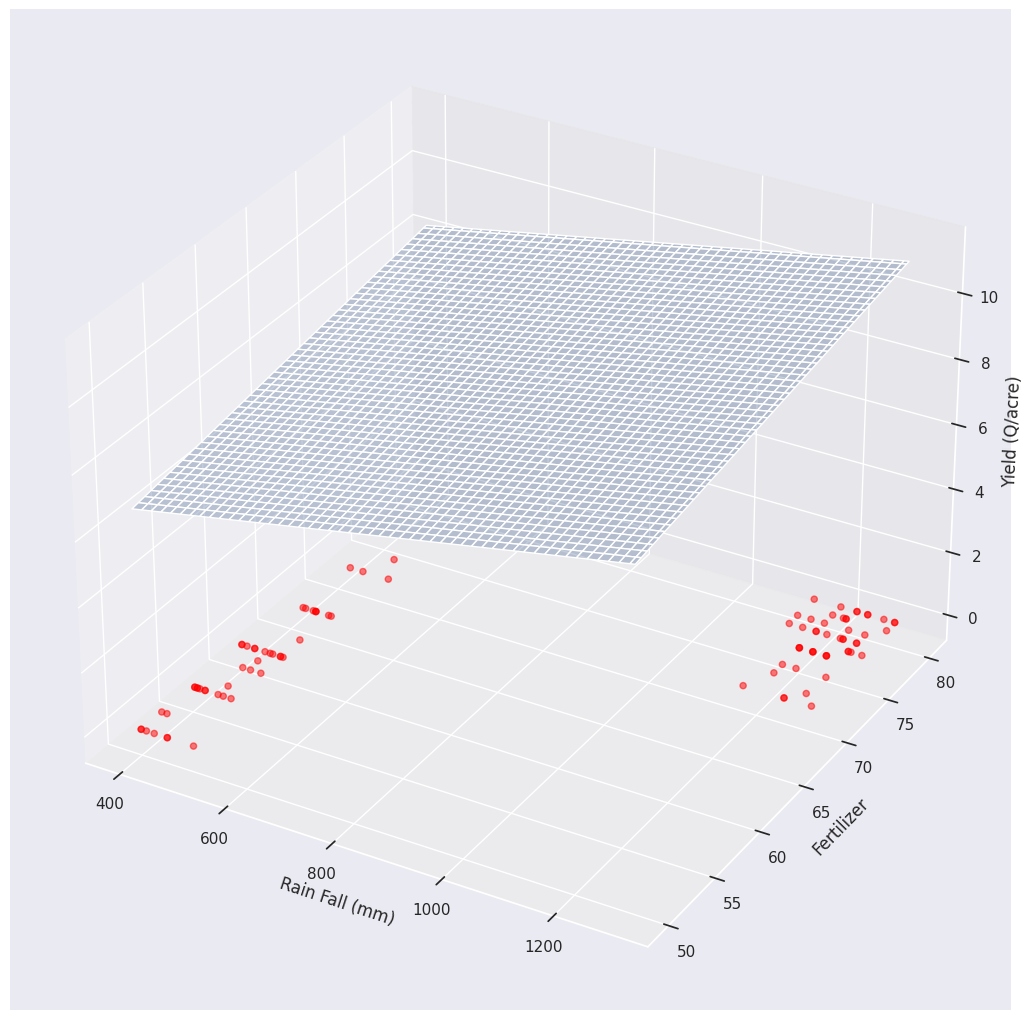

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme()
df2 = pd.read_csv('crop.csv')
df2 = df2.dropna()

df2['Temperatue'] = pd.to_numeric(df["Temperatue"])
Xmulti = df2.drop(['Yeild (Q/acre)','Nitrogen (N)','Phosphorus (P)','Potassium (K)','Temperatue'],axis=1)
ymulti = df2['Yeild (Q/acre)']

Multi_X_Train,Multi_X_Test,Multi_y_Train,Multi_y_Test = train_test_split(Xmulti,ymulti,test_size=0.3,random_state=101)
ML_model = linear_model.LinearRegression()
ML_model.fit(Multi_X_Train,Multi_y_Train)
ML_predictions = ML_model.predict(Multi_X_Test)
print(
  'mean_squared_error : ', mean_squared_error(Multi_y_Test, ML_predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(Multi_y_Test, ML_predictions))
print(f'Coefficient: {ML_model.coef_}')
print(f'Intercept: {ML_model.intercept_}')
print("Coefficient of determination: %.2f" % r2_score(Multi_y_Test, ML_predictions)) #closer to one better
print(Xmulti)


print(str(ML_model.score(Xmulti, ymulti)) + " score for whole data")
print(str(ML_model.score(Multi_X_Test, Multi_y_Test)) + " score for test data")

predictYield=ML_model.predict([[1280, 120]])
print(str(predictYield)+ " is the predicted yield when there is 1280mm of rainfall with 120 fertilizer.")

xMulti1, xMulti2 = np.meshgrid(np.linspace(df2['Rain Fall (mm)'].min(),df2['Rain Fall (mm)'].max(),100),
                                        np.linspace(df2['Fertilizer'].min(),df2['Fertilizer'].max(),100)
                                        )
multiOnlyX = pd.DataFrame({'Rain Fall (mm)':xMulti1.ravel(),
                           'Fertilizer':xMulti2.ravel()})

fittedY =ML_model.predict(multiOnlyX)

fittedY=np.array(fittedY)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,13))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Rain Fall (mm)'],df2['Fertilizer'],c='red', marker='o', alpha=0.5)
ax.plot_surface(xMulti1,xMulti2,fittedY.reshape(xMulti1.shape), color='b', alpha=0.3)
ax.set_xlabel('Rain Fall (mm)')
ax.set_ylabel('Fertilizer')
ax.set_zlabel('Yield (Q/acre)')
plt.show()

**Evaluation:**

In this multiple linear regression. We've only picked temperature, fertilizer, and rainfall to be the multiple features to determine the Yield. We've dropped all the other column. The score the model gave is great enough for predicting the yield with the prediction done with other numbers to be sensible.

**Polynomial Linear Regression**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


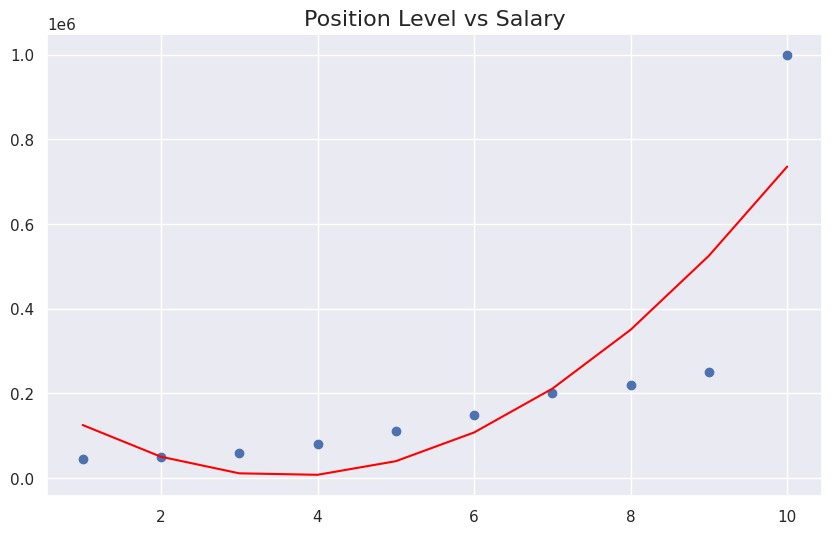

Coefficient: [[-128401.51515152   17840.90909091]]
Intercept: [235833.33333333]
0.7491335768382544is the score for its own data set
[[982166.66666667]] is the predicted salary of a person with a level 11 Position in the company


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
salarydf = pd.read_csv('salary.csv')
salarydf.info()
xLevel = salarydf['Level '].to_numpy()
ySalary = salarydf['Salary'].to_numpy()

ySalary = ySalary.reshape(-1,1)
poly_features = poly.fit_transform(xLevel.reshape(-1,1))
poly_reg_model = linear_model.LinearRegression()
poly_reg_model=poly_reg_model.fit(poly_features,ySalary)
y_predicted = poly_reg_model.predict(poly_features)


plt.figure(figsize=(10,6))
plt.title("Position Level vs Salary",size=16)
plt.scatter(xLevel,ySalary)
plt.plot(xLevel,y_predicted,c="red")
plt.show()
print(f'Coefficient: {poly_reg_model.coef_}')
print(f'Intercept: {poly_reg_model.intercept_}')
print(str(poly_reg_model.score(poly_features,ySalary))+ "is the score for its own data set")
Level = 11
polyPred = poly_reg_model.predict([[Level,Level*Level]])
print(str(polyPred) +" is the predicted salary of a person with a level "+ str(Level) +" Position in the company")

**Evaluation:**

# **Logistic Regression**

In [ ]:
#Loading the data

import pandas as pd

DF = pd.read_csv("/content/HeartDiseaseData.csv")
DF

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
#Dropping not needed columns for better computation

DF = DF.drop(columns = 'Unnamed: 0')
DF

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
#Converting strings to numerical values for better computation

DF['ChestPain'] = DF['ChestPain'].astype('category')
DF['ChestPain'] = DF['ChestPain'].cat.codes

DF['Thal'] = DF['Thal'].astype('category')
DF['Thal'] = DF['Thal'].cat.codes

DF['AHD'] = DF['AHD'].astype('category')
DF['AHD'] = DF['AHD'].cat.codes

DF

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [ ]:
# Check NaN values and drop it to get better computation for our Logistic Regression
DF.isnull().sum()

#We got 4 null values in Ca column

#since we have 4 Null values, we are going to drop it

DF = DF.dropna()

#As a result we successfully dropped 4 NaN values of Ca column to get the data ready


In [ ]:
#Now that the data is ready, all of the columns except AHDX
#is going to be our independent variable (X or input variable)
#since we are predicting AHD, it's gonna be our (y variable)

#Separation of independent variable to dependent variable (AHD)
X = DF.drop(columns = 'AHD')
y = DF['AHD']

In [ ]:
#Splitting to get train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 21)

In [ ]:
#Since some of the data is bigger than other, it would be overpowering for the
#other so we manage that using scaler that uses mean and STD to scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#The fit() method helps in fitting the data into a model, transform() method
#helps in transforming the data into a form that is more suitable for the model.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[-0.96343013, -1.48841682,  0.21213203, ...,  2.42833312,
        -0.70203785, -0.49996949],
       [ 0.26708424,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       [-0.06851059,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       ...,
       [-1.85834967,  0.67185481,  2.32335085, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 2.16878827, -1.48841682,  1.26774144, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 1.05013884, -1.48841682, -0.84347737, ...,  0.70792084,
         1.42442462, -0.49996949]])

In [ ]:
from sklearn.linear_model import LogisticRegression

#Model Training
logistic_regression = LogisticRegression(random_state = 0).fit(X_test_scaled, y_test)
#logistic_regression = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)
#Checking if it can predict
logistic_regression.predict(X_test_scaled)
#logistic_regression.predict(X_train_scaled)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int8)

In [ ]:
#Checking the accuracy for train and test data:

#logistic_regression.score(X_train_scaled, y_train)
logistic_regression.score(X_test_scaled, y_test)

0.8333333333333334

In [ ]:
#Testing sample inputs

# Sample input for prediction
sample_input = [67, 1, 0, 120, 229, 0, 2, 129, 1, 2.6, 2, 2.0, 2]
AHDprediction = logistic_regression.predict([sample_input])[0]

# Checking if the probability is 1 or 0
print('Sample data are: Age, Sex, ChestPain, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope, Ca, Thal = [67, 1, 0, 120, 229, 0, 2, 129, 1, 2.6, 2, 2.0, 2]\n')

if AHDprediction == 1:
    print('Prediction: The person will most likely aquired heart disease')
else:
    print('Prediction: The person will most likely NOT aquired heart disease')

Sample data are: Age, Sex, ChestPain, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope, Ca, Thal = [67, 1, 0, 120, 229, 0, 2, 129, 1, 2.6, 2, 2.0, 2]

Prediction: The person will most likely aquired heart disease


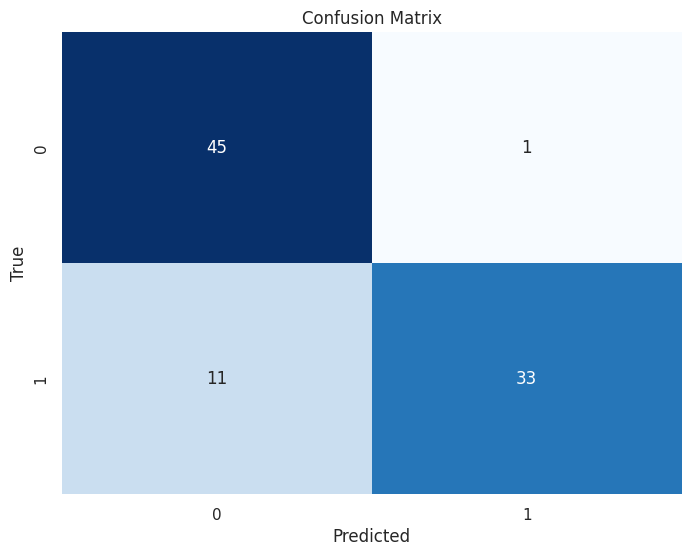

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        46
           1       0.97      0.75      0.85        44

    accuracy                           0.87        90
   macro avg       0.89      0.86      0.86        90
weighted avg       0.89      0.87      0.86        90

Decision boundary plotting is supported only for datasets with 2 features.


In [ ]:
#Visualization purposes

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions

# Assuming you have already trained your logistic regression model
logistic_regression = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

# Prediction on the test set
y_pred = logistic_regression.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=logistic_regression.classes_,
            yticklabels=logistic_regression.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Decision Boundary (if you have only two features)
if X_train_scaled.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_train_scaled, np.array(y_train), clf=logistic_regression, legend=2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression - Decision Boundary')
    plt.show()
else:
    print("Decision boundary plotting is supported only for datasets with 2 features.")


**Evaluation: This part uses a logistic regression to a heart disease data. It wants to predict if the certain features of individual can identify if the person is most likely to have or having heart disease or Aquired Heart Disease. Now, what we did in here is we organize the data. Remove unwanted columns, check for the null values and droppig those values that are not needed, translate the data that are in string data type into numerical values to better calculate it using logistic regression. After organizing the data, we assign our independent and dependent variable then we separate it. Next is we split the data set, since a portion of it will be used in training data and some of it is in test data. The values are good but some of it are too big for the others so we used scalar that computes its scale using STD and mean. Then we used sklearn to import logistic regression and we fit the scaled training data so that the model will know it very well. After that, we check if the train data can predict the independent variable or (AHD) using dependent variables. Then we got the results of the prediction using the test data presented above. Lastly, we check both of our data to prove its integrity and accuracy using score() and comparison to both of its score results.**

#**Decision Tree**

In [ ]:
# Setting up the packages needed for the decision tree algorithm implementation
# for the bank

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

balance_data = pd.read_csv('/content/Bank_data.csv',sep= ',', header= 0)

In [ ]:
# Checking the numbers/length of our data
print ("Lenght: ", len(balance_data))

Lenght:  1000


In [ ]:
# Checking how many columns do we have in that data
print ("Shape: ", balance_data.shape)

Shape:  (1000, 6)


In [ ]:
# Printing Dataset
print ("DATASET")
balance_data.head(10)

DATASET


,initial payment,last payment,credit score,house number,sum,results
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
5,406,10187,166,3068,13827,yes
6,461,10252,172,3062,13947,yes
7,158,10192,144,3469,13963,yes
8,136,10376,230,3223,13965,yes
9,194,10092,626,3083,13995,yes


In [ ]:
# Splitting the independent variable X to dependent variable or target value (y)

X = balance_data.values[:, 0:4]
Y = balance_data.values[:,5]

# We split the data because the test set must be separated from the training set
# to provide an unbiased estimate of the model's performance.

# Using this splitting method, it trains the model on one set and evaluate its performance on another set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
# this code creates a decision tree classifier using the entropy criterion, limits the maximum depth of the tree to 3,
# and sets a minimum number of samples required at a leaf node to 5. Then, it trains the classifier on the provided training data.

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=4, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

In [ ]:
# Predicting whether the customer is able to pay the loan or not based on our
# input variables using the prediction of entropy.

y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes

Accuracy:  94.0
Sample data are: last payment, credit score, house number, sum = [10187, 480, 3094, 13702]
Prediction: The customer will most likely pay the loan


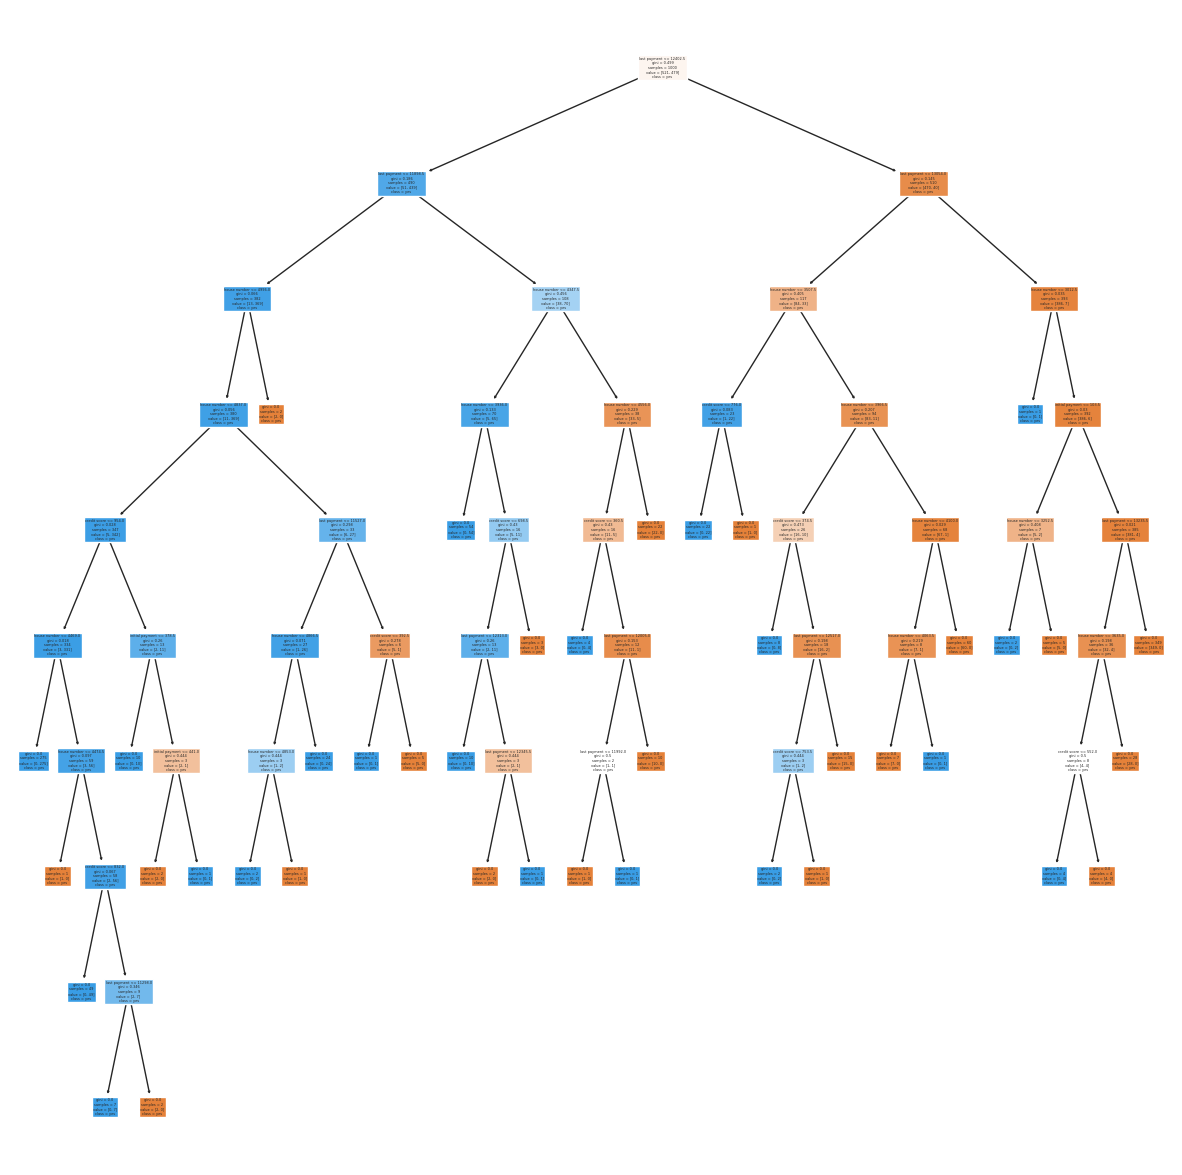

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
bank_result = pd.read_csv('/content/Bank_data.csv')
XX = bank_result.values[:, 0:4]
YY = bank_result.values[:,5]

# Fit decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(XX, YY)

#Testing sample inputs

# Checking the accuracy of the result
print("Accuracy: ", accuracy_score(y_test, y_pred_en) * 100)

# Sample input for prediction
sample_input = [10187, 480, 3094, 13702]  # Adjust based on the correct number of features
prediction = clf_entropy.predict([sample_input])[0]  # Make a prediction on a sample input and get the result

# Checking if the probability is greater than or equal to 0.70
print('Sample data are: last payment, credit score, house number, sum = [10187, 480, 3094, 13702]')

if str(prediction) == "yes":
    print('Prediction: The customer will most likely pay the loan')
else:
    print('Prediction: The customer is most likely NOT to pay the loan')

# Plot decision tree
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=bank_result.columns, class_names=bank_result['results'])
plt.show()



# The max_depth parameter controls the maximum depth of the tree from the root node to the farthest leaf node,
#but it doesn't limit the total number of splits in the tree.

# Each node in a decision tree represents a decision point based on a feature's value, and each split divides
#the data into two or more subsets. The tree continues to split until it reaches the specified maximum depth
#or until further splits don't improve the model's performance according to the splitting criterion (in this case, entropy).


**Evaluation:** What we want to do in the implementation of decision tree algorithm is to predict whether the customer of the bank will pay its loan or not using some of the data that they have. We use decision tree because it fits to the vast randomness of data values since it uses entropy to get the gain which can help in distinguishing and separating the data thoroughly.


**What we did in here: 1st** - we identified the needed packages for the implementation of decision tree algorithm. 2nd - we check the columns and rows of data, together with its column names. 3rd - is we separate the independent (X/input variables) and dependent variable (y) and we split the data to separate it from the test set to provide an unbiased estimate of the train data/model's performance. In addition, through splitting method, it trains the model on one set and evaluate its performance on another set. Therefore they must be split. 4th - we created decision tree classifier that uses entropy criterion, limits the maximum depth of the tree to 3, and sets a minimum number of samples required at a leaf node to 5. Then, it trains the classifier on the provided training data. 5th - we used the entropy classifier (fitted/trained already) to generate prediction on the test set which we need. We used this decision tree classifier for both training data and test data. 6th - we check the accuracy of the result using accuracy_score from sklearn.metrics. We tested the accuracy for both test and train data to know if they are close to each other and if they are both accurate. 7th - we tried to see the visualization of the results column using matplotlib.pyplot and plot_tree from sklearn. We got 94% accuracy for the model. Therefore, it is 94% accurate that it can predict if the customer will pay the loan or not.

# **Random Forest**


Accuracy: 0.8051948051948052
Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age 
 with values of [0, 120, 80, 29, 0, 33.6, 0.1, 50]
Patient with this data is expected to have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


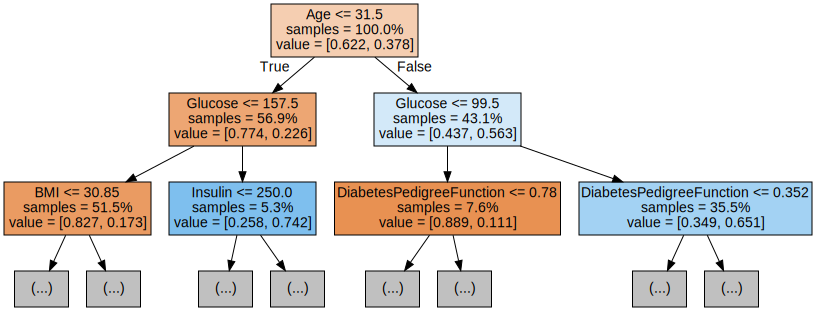

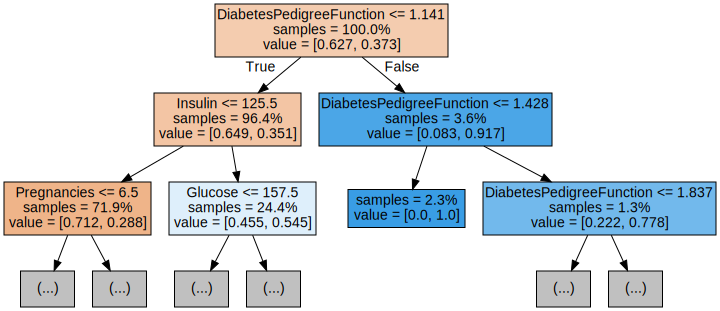

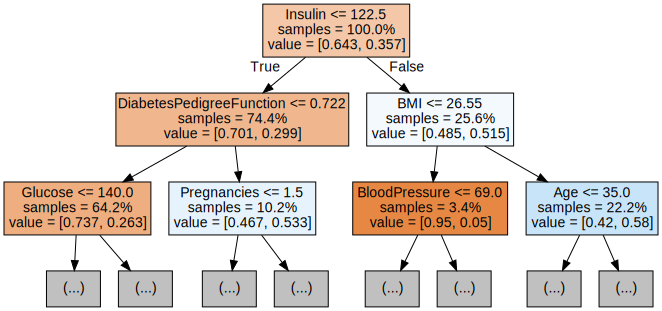

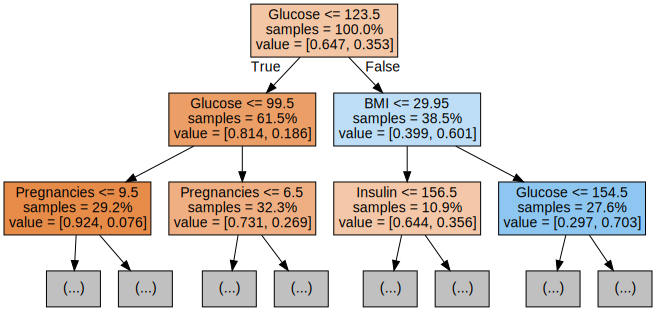

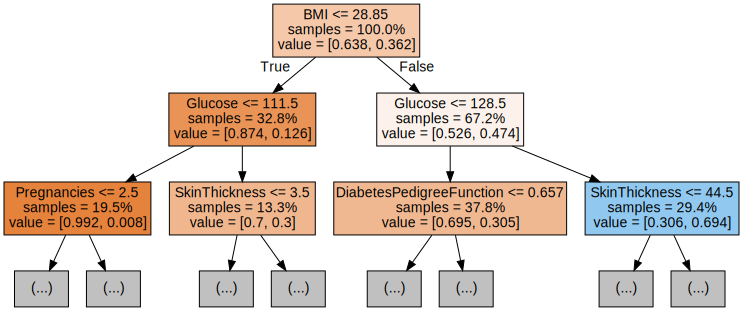

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation library and modules
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#Loading the data
df = pd.read_csv('diabetes.csv')

#Separating the input and target value. In this case we drop the outcome column
# (y or target value) to assign it in our input data and use outcome column for our target value.
xDia = df.drop('Outcome',axis=1)
yDia= df['Outcome']

#We split the data and apply train_test_split to it to train the model on one set and evaluate its performance on another set
Xdia_train, Xdia_test, ydia_train, ydia_test = train_test_split(xDia, yDia, test_size=0.2)

#We define and use random forest classifier using n_estimators=100 to limit the decision trees created to 100.
rf = RandomForestClassifier(n_estimators=100)

#It is where the random forest classifier (rf) is being trained on a dataset.
rf.fit(Xdia_train, ydia_train)

#Prediction of test data after the it undergone random forest
ydia_pred = rf.predict(Xdia_test)

#testing the accuracy
accuracy = accuracy_score(ydia_test, ydia_pred)
print("Accuracy:", accuracy)
ExampleData = [0,120,80,29,0,33.6,0.1,50]
PredictedOut=rf.predict([ExampleData])
print("Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age \n with values of "+str(ExampleData))
if PredictedOut ==1:
    print("Patient with this data is expected to have diabetes")
else:
    print("Patient with this data is expected to have no diabetes")



#For visualization
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=Xdia_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

**Evaluation: What we want to predict in here is if the person have diabetes or not. What we did is use random forest classifier to manage the independent and dependent data. At first, we imported the needed packages and libraries. Next is, we load and check the data if it needs more organization. Next is we split our data into independent and dependent data and train it using train_test_split with a test size of 0.2. Next is we define the random forest classifier with an estimator of 100 meaning that the random forest will consist of 100 decision trees. We chose 100 to get much better results. Then next is we fit our training model using random forest classifier. After that, we predict the test data that undergone random forest classifier. To better see the accuracy we check it through accuracy_score of our model then visualize it to see the different trees created by our random forest classifier. The model accuracy is around 60-80% since every iteration the tree changes with random data from bootstrapping and the entropy generated on each data. Accuracy is acceptable although i had to limit the depth to be generated due to how its not pleasant to look at.**